In [4]:
import numpy as np
from keras.datasets import cifar10
np.random.seed(10)

In [5]:
(x_img_train, y_label_train),(x_img_test, y_label_test) = cifar10.load_data() 

170500096/170498071 [==============================] - 28s 0us/step


In [6]:
print('train:',len(x_img_train))
print('train:',len(x_img_test))

train: 50000
train: 10000


In [7]:
x_img_train.shape

(50000, 32, 32, 3)

In [9]:
y_label_train.shape

(50000, 1)

In [10]:
#針對物件圖像數據集的類別編列成字典
label_dict = {0:'airplane', 1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog'
              ,6:'frog',7:'horse',8:'ship',9:'truck'}

In [12]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images, labels, prediction, idx,num =10):
    
    fig = plt.gcf()
    #得到當前的 figure(get current figure)
    fig.set_size_inches(12,14)
    if num>25: num =25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        #subplot(numRows, numCols, plotNum):plotNum表示這次畫的圖要放的位置在哪裡
        #，1就是放在第一個位子(先由左而右，在由上而下)
        ax.imshow(images[idx],cmap = 'binary')
        #.imshow:利用matplotlib包对图片进行绘制
    
        title = str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title += '=>'+label_dict[prediction[i]]
    
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])    
        idx +=1    
    plt.show()

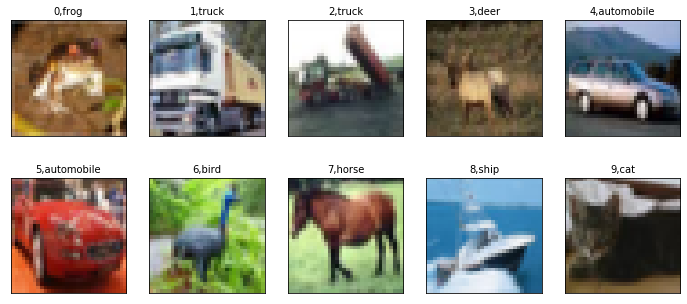

In [13]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train, [],0)

In [15]:
print('x_img_test',x_img_test.shape)
print('y_img_test',y_label_test.shape)

x_img_test (10000, 32, 32, 3)
y_img_test (10000, 1)


# 影像正規化

In [20]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [23]:
x_img_train_normalize = x_img_train.astype('float32')/255
x_img_test_normalize = x_img_test.astype('float32')/255

In [25]:
x_img_test_normalize[0][0][0]

array([0.61960787, 0.4392157 , 0.19215687], dtype=float32)

# 轉換label 為OneHot Encoding

In [26]:
y_label_train.shape

(50000, 1)

In [27]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [28]:
from keras.utils import np_utils
#np_utils.to_categorical將y轉成one-hot
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [44]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# HW cifar100

In [32]:
from keras.datasets import cifar100
(x100_img_train, y100_label_train),(x100_img_test, y100_label_test) = cifar100.load_data(label_mode='fine') 

In [37]:
x100_img_train.shape
y100_label_train.shape

(50000, 1)

In [42]:
def plot_images_labels_prediction(images, labels, prediction, idx,num =10):
    
    fig = plt.gcf()
    #得到當前的 figure(get current figure)
    fig.set_size_inches(12,14)
    if num>25: num =25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        #subplot(numRows, numCols, plotNum):plotNum表示這次畫的圖要放的位置在哪裡
        #，1就是放在第一個位子(先由左而右，在由上而下)
        ax.imshow(images[idx],cmap = 'binary')
        #.imshow:利用matplotlib包对图片进行绘制
    
        title = str(i)+','+str(labels[i])
    
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])    
        idx +=1    
    plt.show()

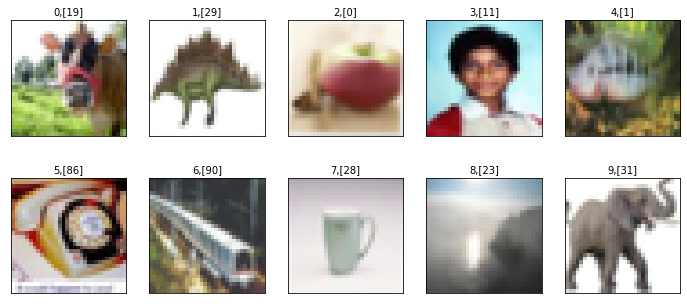

In [43]:
plot_images_labels_prediction(x100_img_train,y100_label_train, [],0)

In [45]:
x100_img_train_normalize = x100_img_train.astype('float32')/255
x100_img_test_normalize = x100_img_test.astype('float32')/255
y100_label_train_OneHot = np_utils.to_categorical(y100_label_train)
y100_label_test_OneHot = np_utils.to_categorical(y100_label_test)

In [46]:
print('x:',x100_img_train_normalize[0][0][0])
print('y:',y100_label_train_OneHot[0])

x: [1. 1. 1.]
y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
